In [5]:
#prediction of wine quality using KNN algorithem

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
data_set = pd.read_csv('winequality-red_ready.csv')
data_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
data_set.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [39]:
#no null value and the data is clean

In [56]:
data_set_outcome=data_set['quality']
data_set=data_set.drop('quality', axis=1)

In [57]:
data_set.info()
data_set_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype
--------------  -----
1599 non-null   int64
dtypes: int64(1)
memory usag

In [42]:
#Data visualization

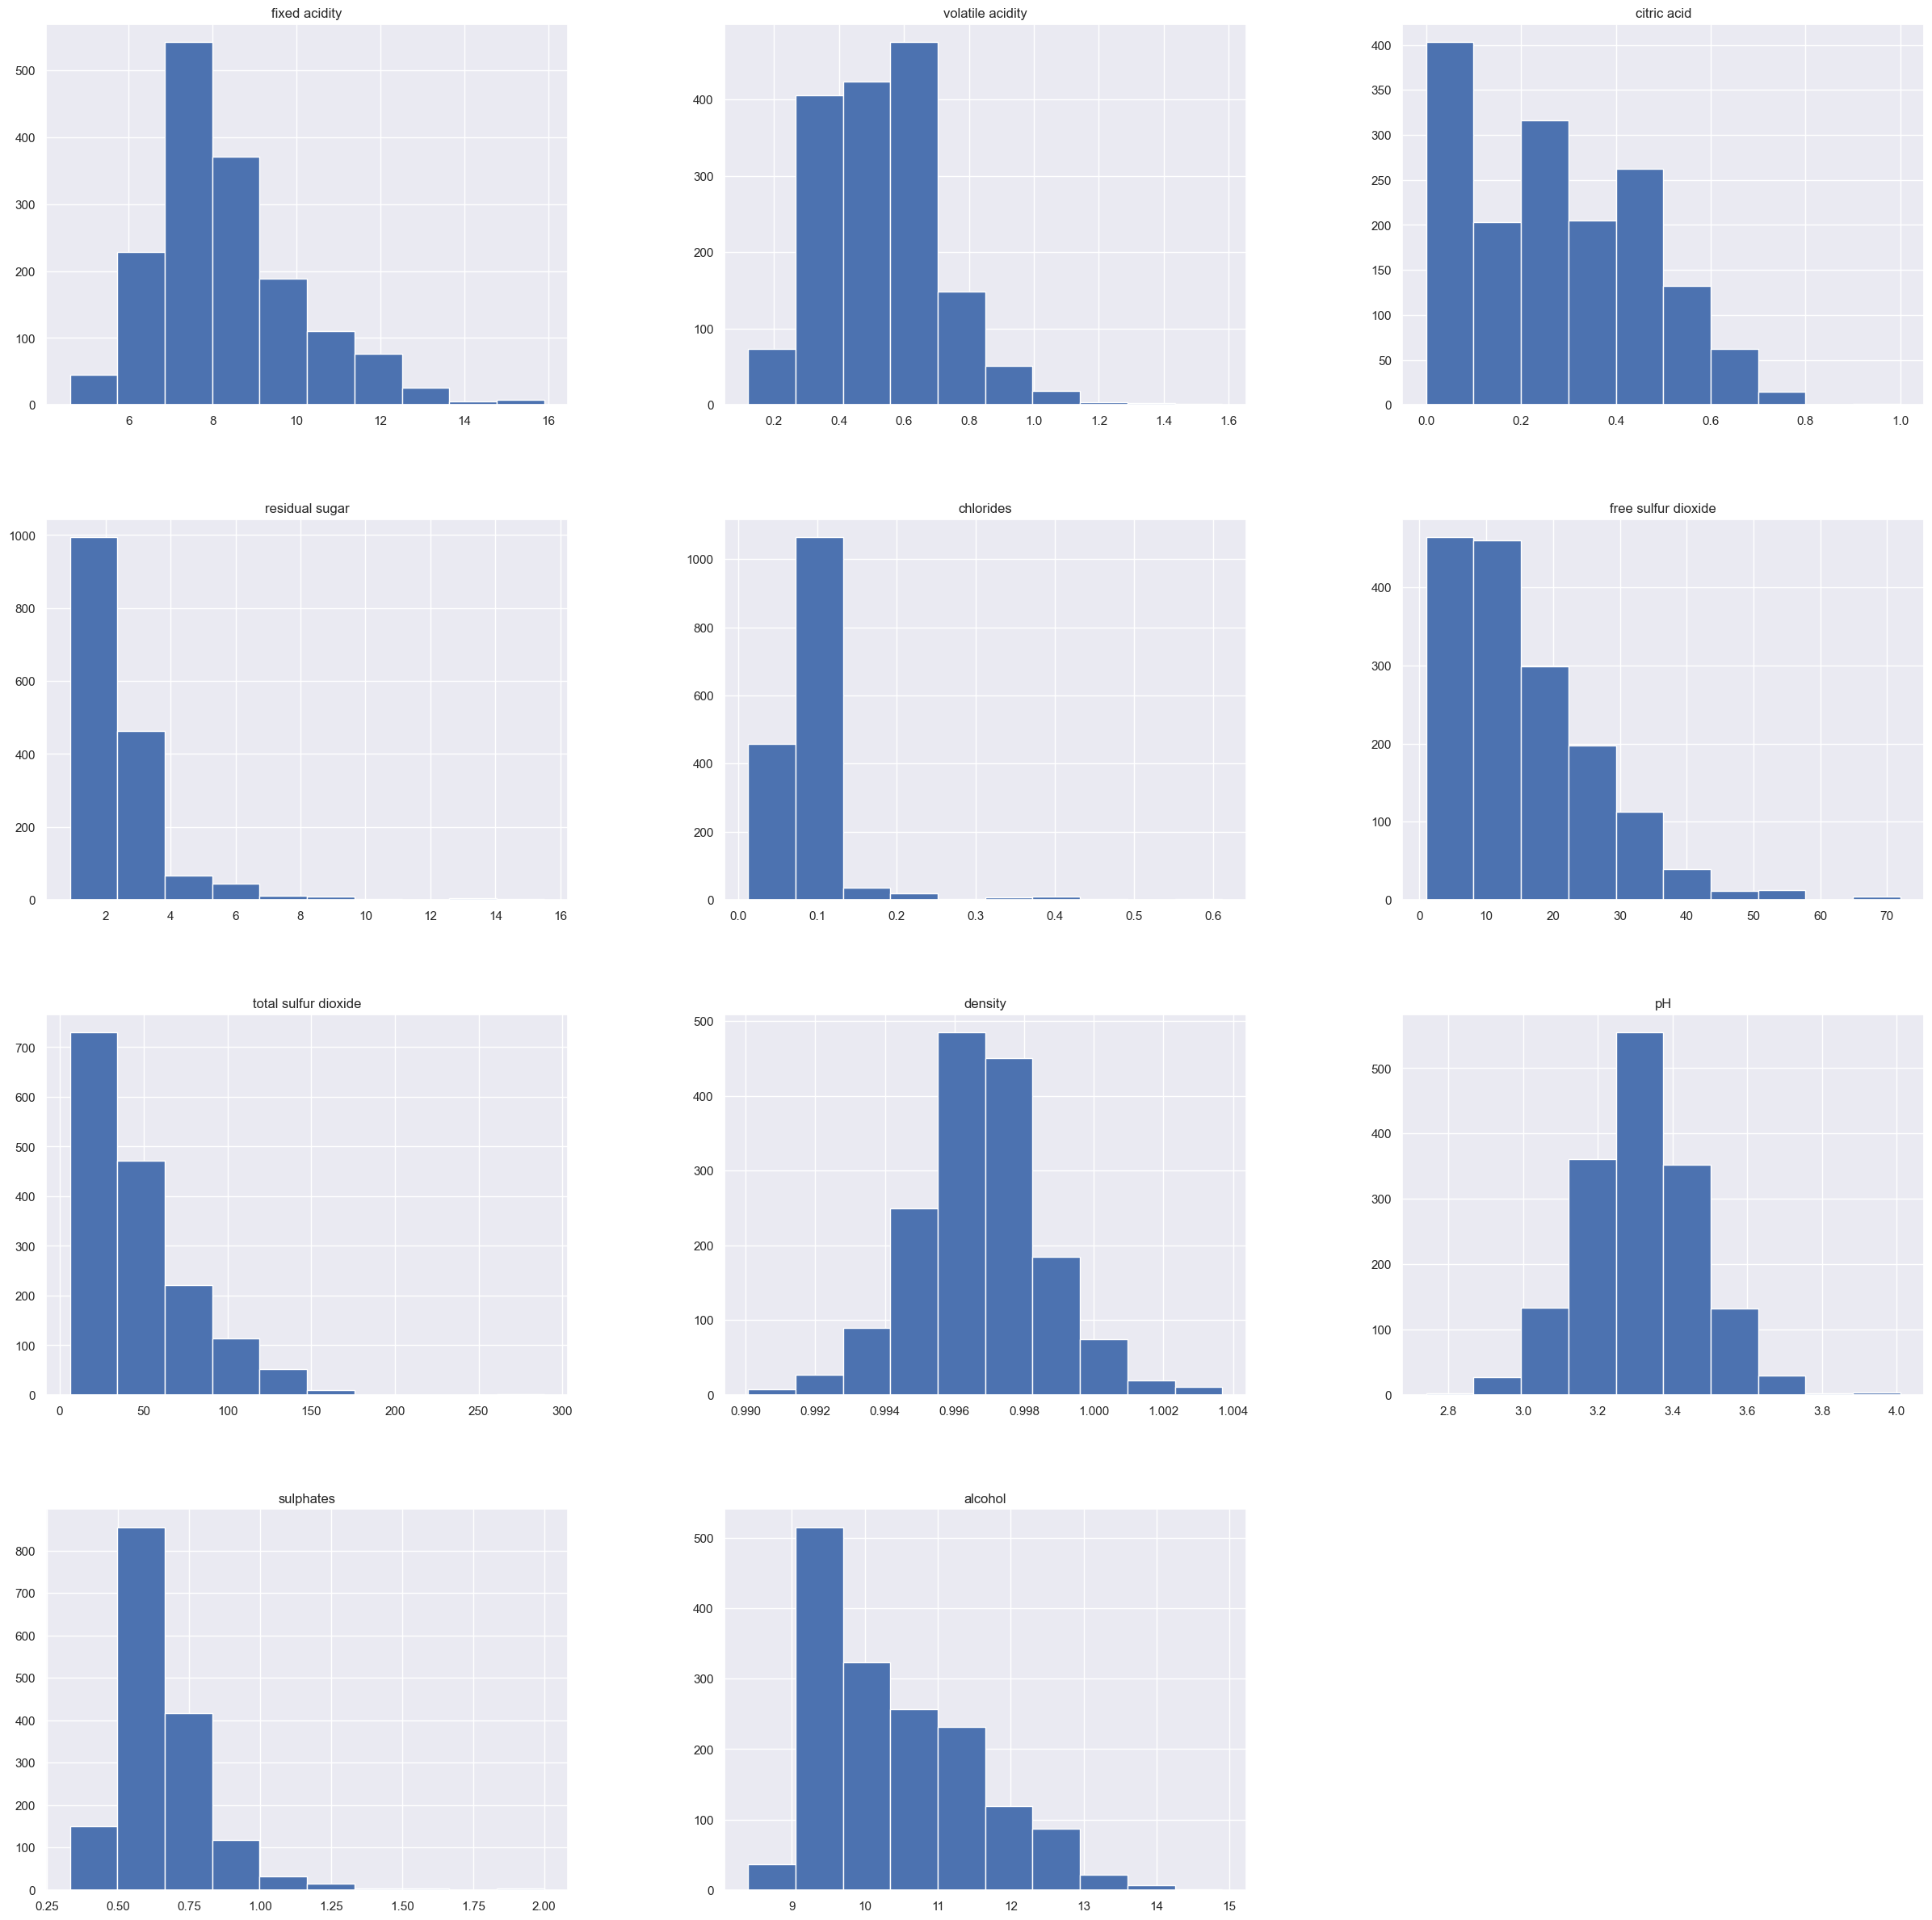

In [43]:
plot_1=data_set.hist(figsize=(30,30))

<Axes: >

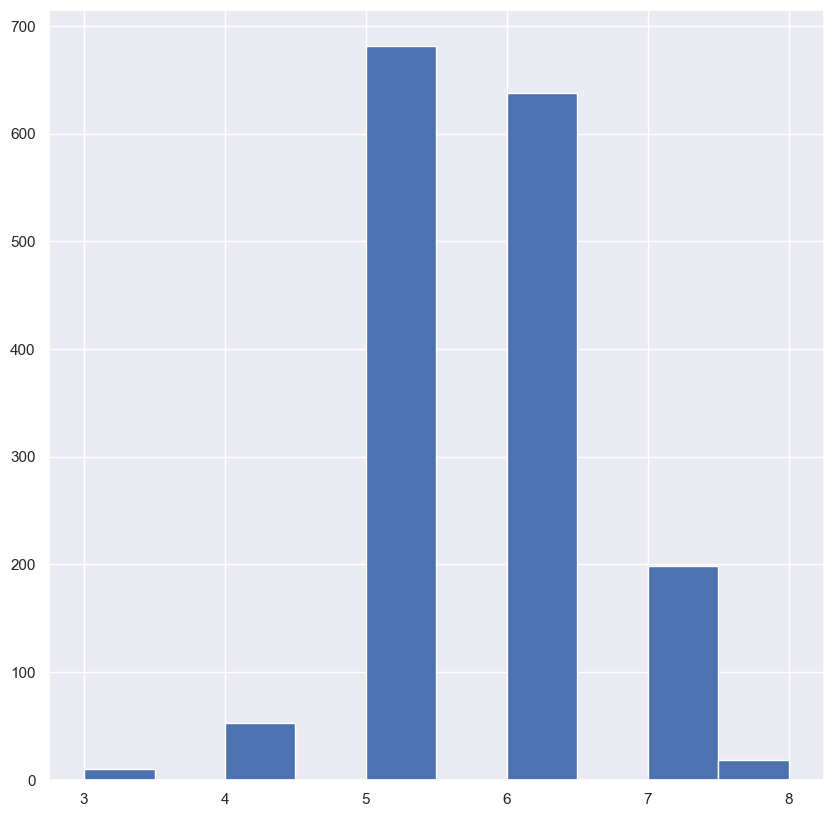

In [44]:
data_set_outcome.hist(figsize=(10,10))

In [45]:
#Plotting scatter plot for entire data frame so that we can get a gist of dependancies of following columns

In [46]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='volatile acidity'>,
        <Axes: xlabel='chlorides', ylabel

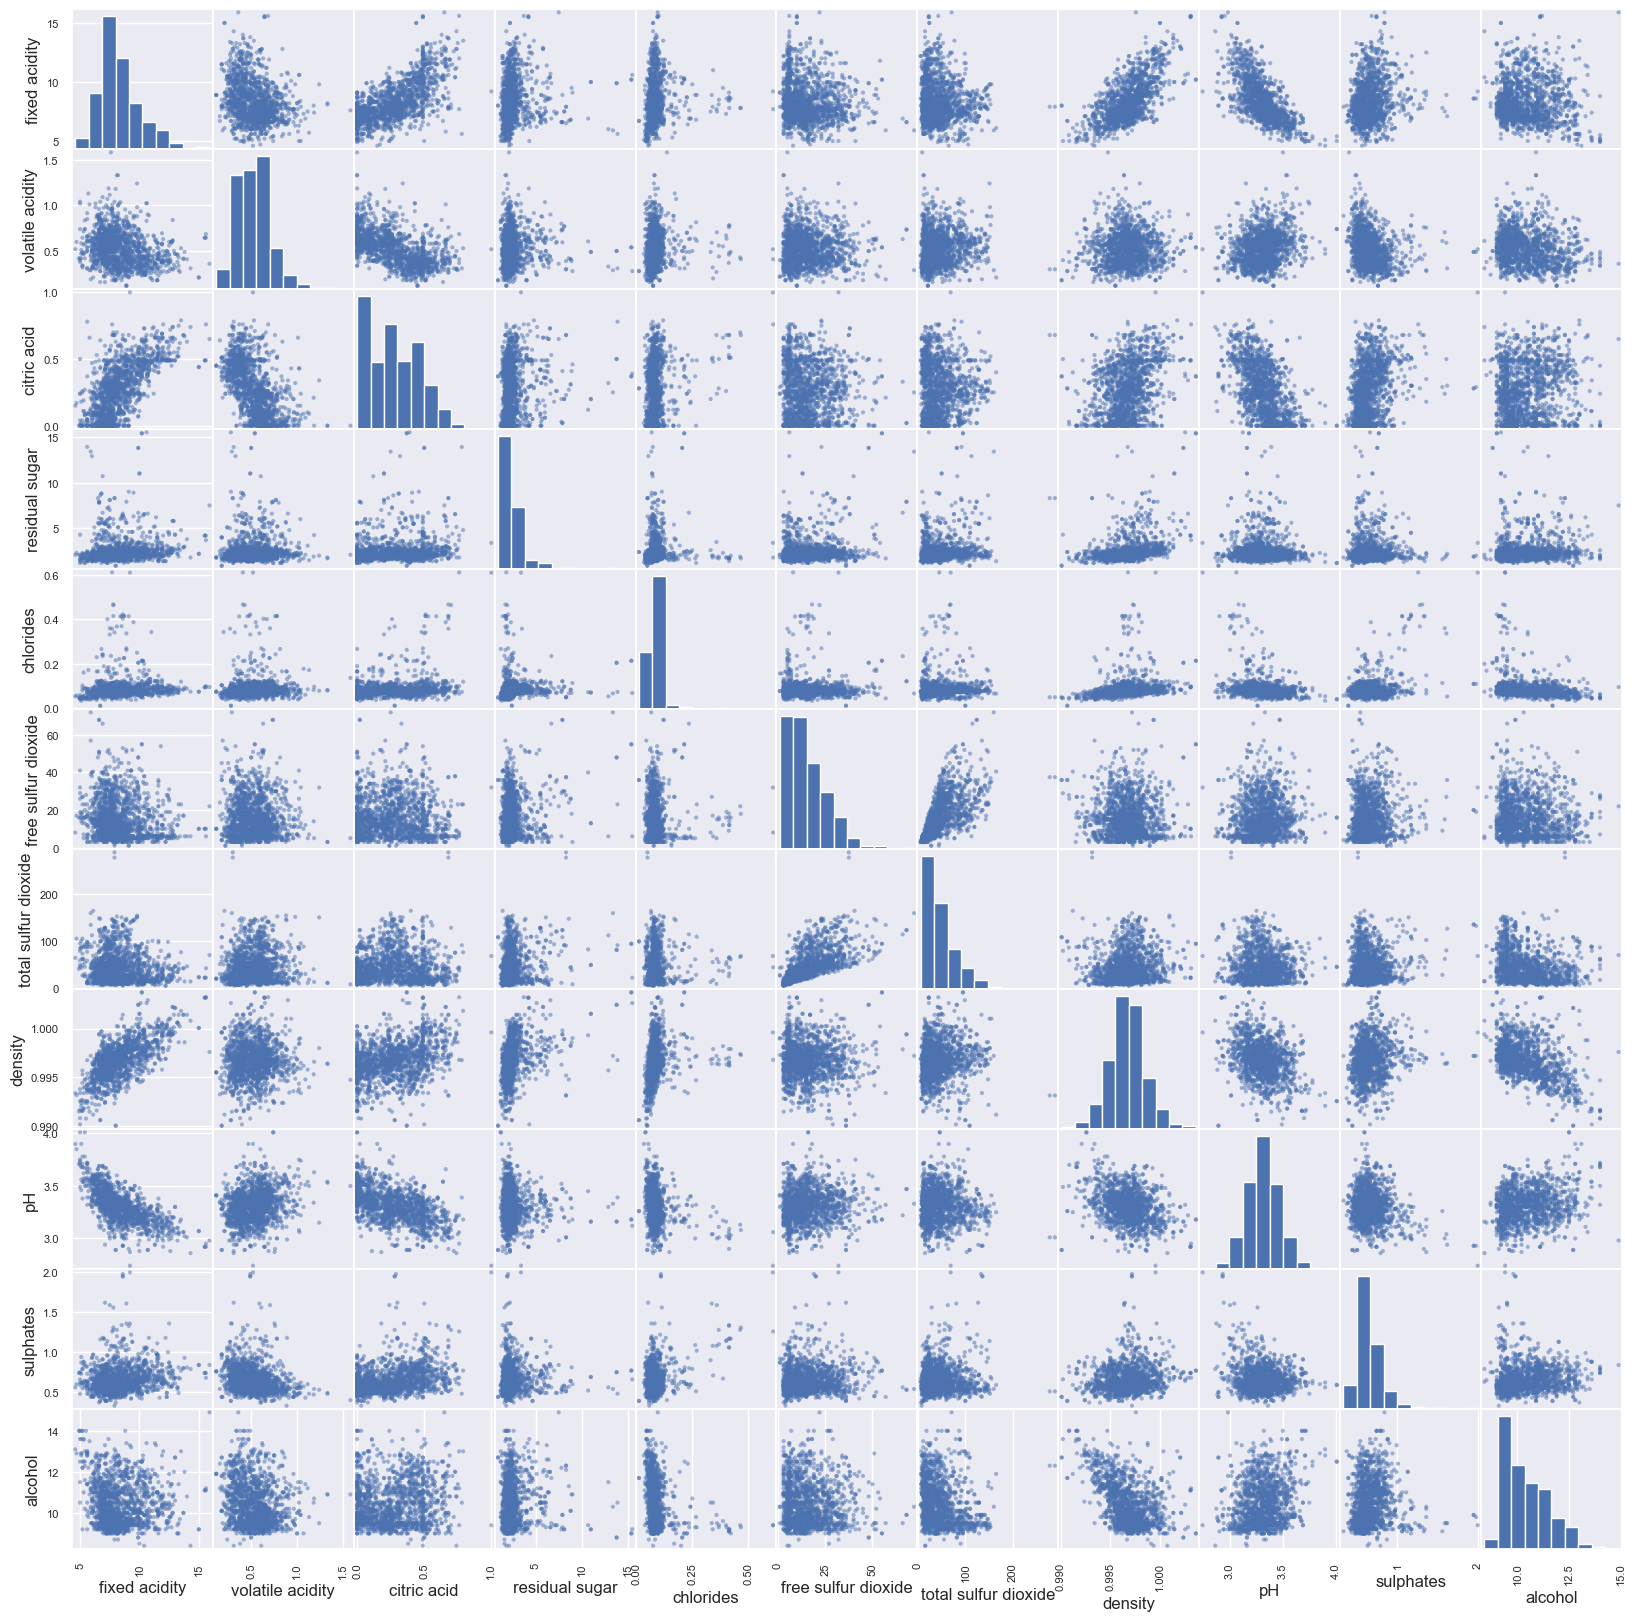

In [47]:
scatter_matrix(data_set,figsize=(20,20))

In [49]:
#Scaling the data for easy accessibility

In [50]:
from sklearn.preprocessing import StandardScaler
s_s = StandardScaler()

In [51]:
data_set.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [58]:
data_set=pd.DataFrame(s_s.fit_transform(data_set), columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [60]:
data_set
#Excluding quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [61]:
data_set_outcome

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [127]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [91]:
data_set_train, data_set_test, data_set_outcome_train, data_set_outcome_test = train_test_split(data_set, data_set_outcome, test_size=0.2)

In [92]:
#Model building Using KNN

In [99]:
test_score=[]
train_score=[]

for i in range(1,25):#takes 25 values and iterating for best outcome
    knn=KNeighborsClassifier(i)
    knn.fit(data_set_train,data_set_outcome_train)
    train_score.append(knn.score(data_set_train, data_set_outcome_train))
    test_score.append(knn.score(data_set_test, data_set_outcome_test))

In [100]:
train_score

[1.0,
 0.8068803752931978,
 0.7802971071149335,
 0.7302580140734949,
 0.6989835809225958,
 0.6849100860046912,
 0.6622361219702892,
 0.6630179827990618,
 0.6575449569976545,
 0.6544175136825645,
 0.6512900703674745,
 0.6528537920250196,
 0.6458170445660673,
 0.653635652853792,
 0.6458170445660673,
 0.6317435496481626,
 0.6293979671618452,
 0.6207974980453479,
 0.6168881939014855,
 0.617670054730258,
 0.619233776387803,
 0.6207974980453479,
 0.6153244722439406,
 0.6254886630179828]

In [101]:
test_score

[0.68125,
 0.625,
 0.603125,
 0.628125,
 0.61875,
 0.609375,
 0.59375,
 0.60625,
 0.609375,
 0.596875,
 0.61875,
 0.6125,
 0.6125,
 0.60625,
 0.63125,
 0.61875,
 0.628125,
 0.621875,
 0.615625,
 0.625,
 0.61875,
 0.615625,
 0.609375,
 0.615625]

In [102]:
#here the K value to get max accuracy in test score is 1 and to find it we do the following

In [106]:
K = test_score.index(max(test_score))+1 #as the indeing starts from 0
K

1

<Axes: >

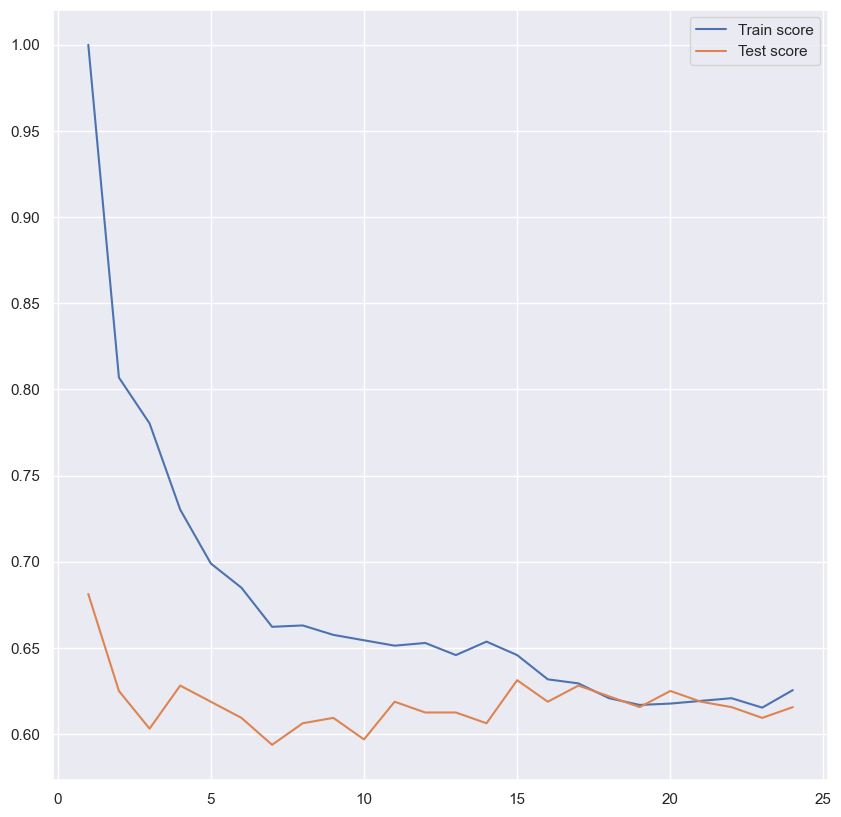

In [118]:
plt.figure(figsize=(10,10))
sns.lineplot(x=range(1,25), y=train_score, markers='+', label='Train score')
sns.lineplot(x=range(1,25), y=test_score,markers='-', label='Test score')

In [114]:
#Test model works at maximum efficiency at K=1

In [119]:
knn=KNeighborsClassifier(K)
knn.fit(data_set_train, data_set_outcome_train)
knn.score(data_set_test, data_set_outcome_test)

0.68125

Text(0.5, 20.049999999999997, 'Predicted label')

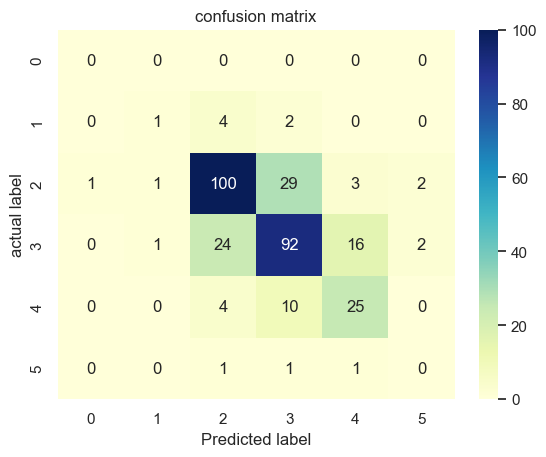

In [125]:
prediction = knn.predict(data_set_test)

cnf=metrics.confusion_matrix(data_set_outcome_test, prediction)
sns.heatmap(pd.DataFrame(cnf),annot=True, cmap='YlGnBu', fmt='g')
plt.title("confusion matrix")
plt.ylabel('actual label')
plt.xlabel("Predicted label")

In [128]:
print(classification_report(data_set_outcome_test,prediction))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.33      0.14      0.20         7
           5       0.75      0.74      0.74       136
           6       0.69      0.68      0.68       135
           7       0.56      0.64      0.60        39
           8       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.39      0.37      0.37       320
weighted avg       0.68      0.68      0.68       320



C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz